In [14]:
import gensim
import numpy as np
import utils 

filename = "./data/ann.txt"
senstences = []
activities = utils.ExtractActivities(filename)

for activity in activities:
    n = len(activity)
    sen = []
    for i in range(1,n):
        if len(activity[i]):
            sen.append(activity[i][2])
    senstences.append(sen)
print senstences[0]

['M007', 'M007', 'T102', 'BATV006', 'BATV019', 'BATV105', 'BATV008', 'BATV009', 'BATV011', 'BATV106', 'BATV002', 'BATV020', 'BATV104', 'BATV005', 'BATV004', 'T102', 'T102', 'LS002', 'LS022']


In [17]:
# import modules & set up logging
import gensim, logging
logging.basicConfig(format='%(asctime)s : %(levelname)s : %(message)s', level=logging.INFO)
 
# train word2vec on the two sentences
model = gensim.models.Word2Vec(senstences, min_count=5)
print model.index2word
print model['M011'].shape


['MA023', 'M009', 'M016', 'MA024', 'M003', 'M011', 'M017', 'MA022', 'LS023', 'M007', 'LS003', 'LS024', 'LS017', 'LS016', 'LS022', 'LS002', 'M018', 'LS009', 'M002', 'D002', 'M015', 'M014', 'LS015', 'M012', 'M010', 'LS012', 'LS011', 'D005', 'M020', 'M013', 'LS020', 'LS013', 'LS007', 'M001', 'T102', 'LS014', 'LS021', 'LS018', 'M008', 'LS001', 'LS008', 'LS010', 'D006', 'LS006', 'LS004', 'M005', 'MA019', 'M021', 'M004', 'T103', 'LS005', 'M006', 'D003', 'T104', 'LS019', 'T105', 'T101', 'BATV017', 'BATV009', 'BATV011', 'BATV015', 'BATV105', 'BATV007', 'T106', 'BATV102', 'BATV022', 'BATV016', 'BATV003', 'BATV024', 'BATV020', 'BATV012', 'BATV106', 'BATV019', 'BATV002', 'BATV005', 'BATV001', 'BATV004', 'BATV104', 'BATV018', 'BATV013', 'BATV010', 'BATV006', 'BATV008', 'BATV021', 'BATV023', 'BATV014', 'BATP023', 'L009', 'L005', 'L004', 'D004', 'L006', 'BATP016', 'L002']
(100L,)


In [16]:
sample = senstences[0]
print sample

X = []
for sample in senstences:
    sample_vector = np.array([0 for x in range(100)],dtype=np.float64)
    for sensor in sample:
        sample_vector += model[sensor]
    X.append(sample_vector)
    
print np.array(X).shape


['M007', 'M007', 'T102', 'BATV006', 'BATV019', 'BATV105', 'BATV008', 'BATV009', 'BATV011', 'BATV106', 'BATV002', 'BATV020', 'BATV104', 'BATV005', 'BATV004', 'T102', 'T102', 'LS002', 'LS022']


KeyError: 'L003'

In [4]:
Y = [activity[0] for activity in activities]
Y = np.array(Y)
print Y.shape



(2655L,)


In [5]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.learning_curve import learning_curve

%matplotlib inline
# 用sklearn的learning_curve得到training_score和cv_score，使用matplotlib画出learning curve
def plot_learning_curve(estimator, title, X, y, ylim=None, cv=None, n_jobs=1, 
                        train_sizes=np.linspace(.05, 1., 20), verbose=0, plot=True):
    """
    画出data在某模型上的learning curve.
    参数解释
    ----------
    estimator : 你用的分类器。
    title : 表格的标题。
    X : 输入的feature，numpy类型
    y : 输入的target vector
    ylim : tuple格式的(ymin, ymax), 设定图像中纵坐标的最低点和最高点
    cv : 做cross-validation的时候，数据分成的份数，其中一份作为cv集，其余n-1份作为training(默认为3份)
    n_jobs : 并行的的任务数(默认1)
    """
    train_sizes, train_scores, test_scores = learning_curve(
        estimator, X, y, cv=cv, n_jobs=n_jobs, train_sizes=train_sizes, verbose=verbose)
    
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    
    if plot:
        plt.figure()
        plt.title(title)
        if ylim is not None:
            plt.ylim(*ylim)
        plt.xlabel("training num")
        plt.ylabel("score")
        plt.gca().invert_yaxis()
        plt.grid()
    
        plt.fill_between(train_sizes, train_scores_mean - train_scores_std, train_scores_mean + train_scores_std, 
                         alpha=0.1, color="b")
        plt.fill_between(train_sizes, test_scores_mean - test_scores_std, test_scores_mean + test_scores_std, 
                         alpha=0.1, color="r")
        plt.plot(train_sizes, train_scores_mean, 'o-', color="b", label="score on train")
        plt.plot(train_sizes, test_scores_mean, 'o-', color="r", label="score on cv")
    
        plt.legend(loc="best")
        
        plt.draw()
        plt.gca().invert_yaxis()
        plt.show()
    
    midpoint = ((train_scores_mean[-1] + train_scores_std[-1]) + (test_scores_mean[-1] - test_scores_std[-1])) / 2
    diff = (train_scores_mean[-1] + train_scores_std[-1]) - (test_scores_mean[-1] - test_scores_std[-1])
    return midpoint, diff



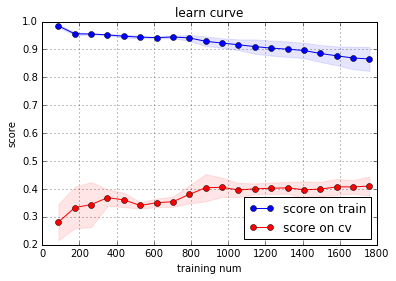

(0.64269700926261497, 0.53247119000874421)

In [6]:
from sklearn import svm
clf = svm.SVC(gamma=0.001, C=100.)

# # fit到RandomForestRegressor之中
# clf = linear_model.LogisticRegression(C=1.0, penalty='', tol=1e-6)
plot_learning_curve(clf, "learn curve", X, Y)


In [7]:
from sklearn import linear_model
# clf = linear_model.LogisticRegression()
clf = linear_model.LogisticRegression(C=1.0)
plot_learning_curve(clf, "learn curve", X, Y)

KeyboardInterrupt: 